In [2]:
pip install requests pandas matplotlib mplfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from datetime import datetime

In [10]:
def fetch_crypto_data(symbol="BTCUSDT", interval="1h", limit=100):
    url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&limit={limit}"
    response = requests.get(url)
    data = response.json()

    # Convert data into a Pandas DataFrame
    df = pd.DataFrame(data, columns=["timestamp", "open", "high", "low", "close", "volume", "close_time", 
                                     "quote_asset_volume", "trades", "taker_base_vol", "taker_quote_vol", "ignore"])
    
    # Convert timestamp to readable datetime
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
    
    # Keep only necessary columns
    df = df[["timestamp", "open", "high", "low", "close", "volume"]]
    
    # Convert price and volume columns to float
    df[["open", "high", "low", "close", "volume"]] = df[["open", "high", "low", "close", "volume"]].astype(float)
    
    return df

# Fetch data
df = fetch_crypto_data()
print(df.head())  # Display first 5 rows


            timestamp       open       high        low      close     volume
0 2025-02-01 08:00:00  102166.49  102276.99  101836.43  102016.85  649.65017
1 2025-02-01 09:00:00  102016.85  102016.85  101412.00  101675.99  638.00804
2 2025-02-01 10:00:00  101675.99  101984.99  101626.82  101638.00  411.87457
3 2025-02-01 11:00:00  101638.00  102055.98  101638.00  102028.81  329.61226
4 2025-02-01 12:00:00  102028.82  102329.01  102009.12  102277.71  449.78635


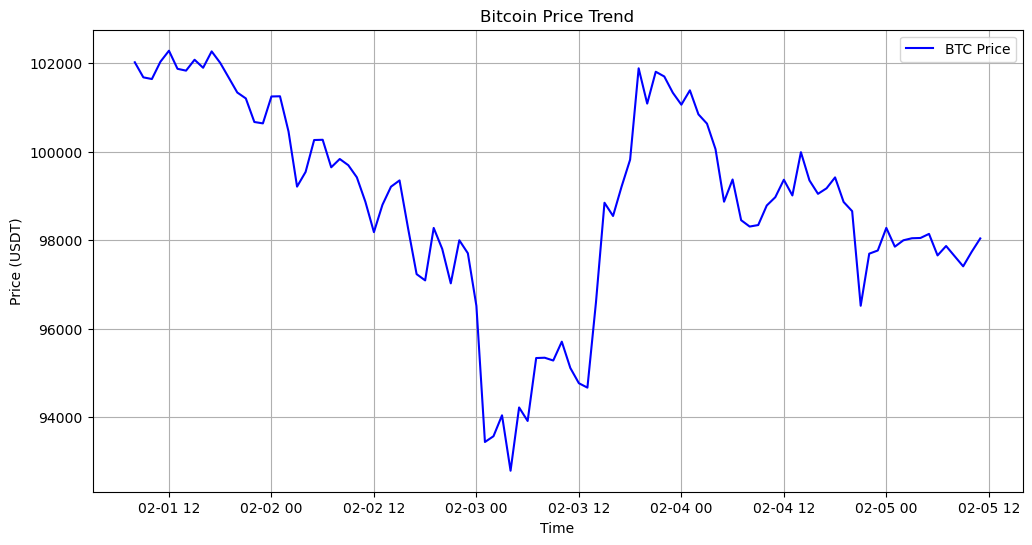

In [12]:
def plot_price_trend(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df["timestamp"], df["close"], label="BTC Price", color="blue")
    plt.xlabel("Time")
    plt.ylabel("Price (USDT)")
    plt.title("Bitcoin Price Trend")
    plt.legend()
    plt.grid()
    plt.show()

# Call the function
plot_price_trend(df)

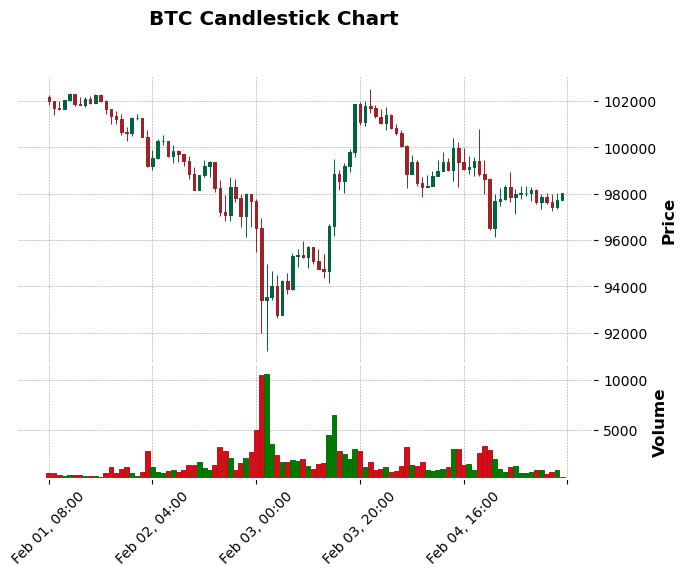

In [14]:
def plot_candlestick_chart(df):
    df.set_index("timestamp", inplace=True)  # Set timestamp as index
    mpf.plot(df, type="candle", style="charles", volume=True, title="BTC Candlestick Chart")

# Call the function
plot_candlestick_chart(df)

In [20]:
df.to_csv("crypto_data.csv", index=False)
print("Data saved to crypto_data.csv")

Data saved to crypto_data.csv
